# Tasks for data visualization

* Categorical scatterplots
* Distributions of observations within categories
* Statistical estimation within categories
* Plotting “wide-form” data
* Drawing multi-panel categorical plots

Sources:
* [Seaborn: Plotting with categorical data](http://seaborn.pydata.org/tutorial/categorical.html)


Datasets
* Kaggle Dataset [WA_Fn-UseC_-HR-Employee-Attrition.csv](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/data), data from IBM HR Analytics Employee Attrition & Performance 

In [1]:
% matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# 1. Load data

In [2]:
def read(fp):
    """
    Notes: 
        - Fields Over18, EmployeeCount, EmployeeNumber, StandardHours - seems don't make sense, drop them
        - Fields Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, OverTime - convert to Categorical datatype
    """
    df = (pd.read_csv(fp)
            .drop(["Over18", "EmployeeCount", "EmployeeNumber", "StandardHours"], axis=1)
            .assign(Attrition=lambda x: pd.Categorical(x['Attrition']),
                    BusinessTravel=lambda x: pd.Categorical(x['BusinessTravel']),
                    Department=lambda x: pd.Categorical(x['Department']),
                    EducationField=lambda x: pd.Categorical(x['EducationField']),
                    Gender=lambda x: pd.Categorical(x['Gender']),
                    JobRole=lambda x: pd.Categorical(x['JobRole']),
                    MaritalStatus=lambda x: pd.Categorical(x['MaritalStatus']),
                    OverTime=lambda x: pd.Categorical(x['OverTime'])
                   ))
    return df

In [3]:
df = read("../input/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [5]:
# get columns numeric and categorical attributes
# details: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html 

cols = df.columns
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = cols.drop(num_cols.tolist())

print("Numeric data columns: \n {} \n".format(num_cols.values))
print("Categorical data columns: \n {}".format(cat_cols.values))

Numeric data columns: 
 ['Age' 'DailyRate' 'DistanceFromHome' 'Education' 'EnvironmentSatisfaction'
 'HourlyRate' 'JobInvolvement' 'JobLevel' 'JobSatisfaction' 'MonthlyIncome'
 'MonthlyRate' 'NumCompaniesWorked' 'PercentSalaryHike' 'PerformanceRating'
 'RelationshipSatisfaction' 'StockOptionLevel' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager'] 

Categorical data columns: 
 ['Attrition' 'BusinessTravel' 'Department' 'EducationField' 'Gender'
 'JobRole' 'MaritalStatus' 'OverTime']


# Categorical scatterplots

* to show the the values of some quantitative variable across the levels of a categorical variable uses 

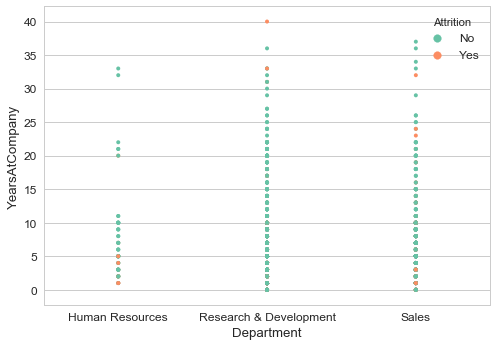

In [26]:
sns.stripplot(x='Department', y='YearsAtCompany', hue='Attrition', 
              data=df,
              size=4, palette="Set2")

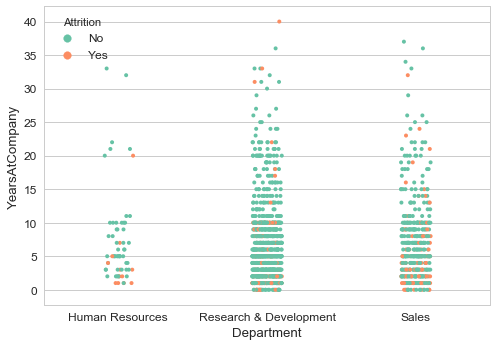

In [27]:
sns.stripplot(x='Department', y='YearsAtCompany', hue='Attrition', 
              data=df,
              size=4, palette="Set2",
              jitter=True)

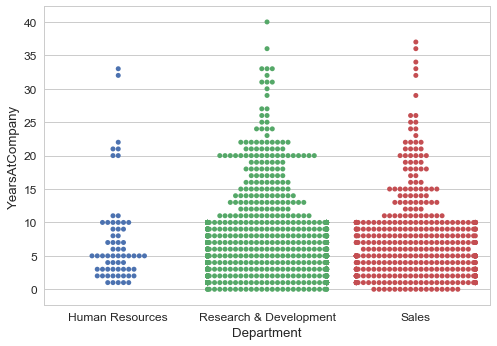

In [28]:
# swarmplot(), plot each scatterplot point on the categorical axis with an algorithm that avoids overlapping points

sns.swarmplot(x='Department', y='YearsAtCompany', data=df);

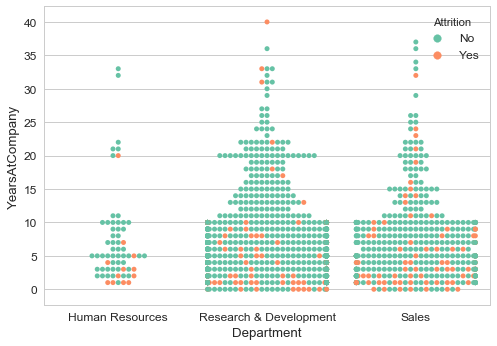

In [31]:
sns.swarmplot(x='Department', y='YearsAtCompany', hue='Attrition',
              data=df,
              palette="Set2");

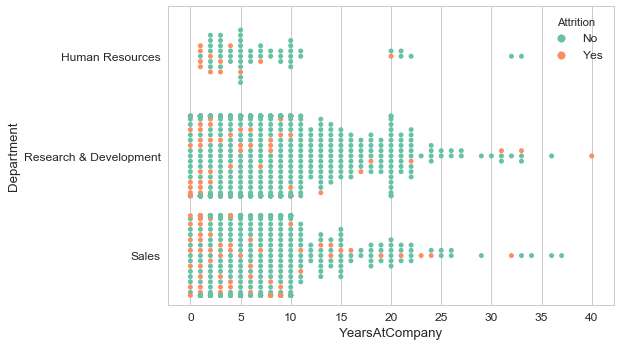

In [33]:
sns.swarmplot(x='YearsAtCompany', y='Department', hue='Attrition',
              data=df,
              palette="Set2");

# Distributions of observations within categories

* ways to summarize this information in ways that facilitate easy comparisons across the category levels

### Boxplots

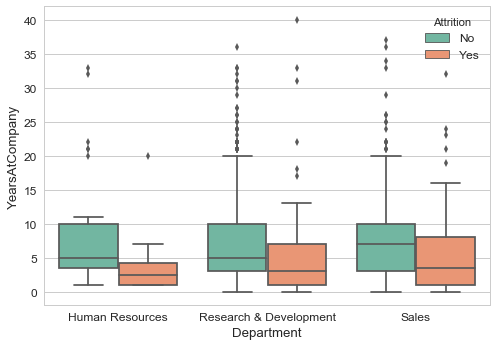

In [35]:
# shows the three quartile values of the distribution along with extreme values

sns.boxplot(x='Department', y='YearsAtCompany', hue='Attrition',
              data=df,
              palette="Set2");

### Violinplots

* combines a boxplot with the kernel density estimation procedure 

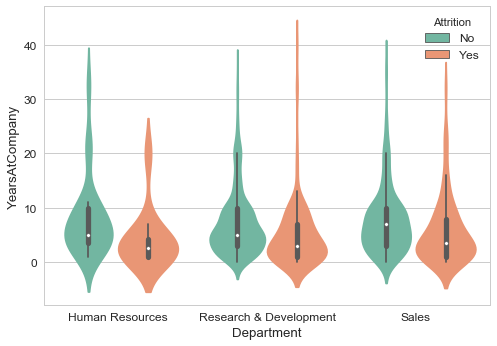

In [39]:
sns.violinplot(x='Department', y='YearsAtCompany', hue='Attrition',
              data=df,
              palette="Set2");

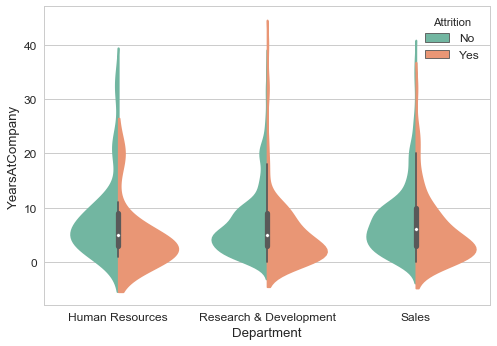

In [41]:
# It’s also possible to “split” the violins when the hue parameter has only two levels

sns.violinplot(x='Department', y='YearsAtCompany', hue='Attrition',
              data=df,
              palette="Set2", split=True);

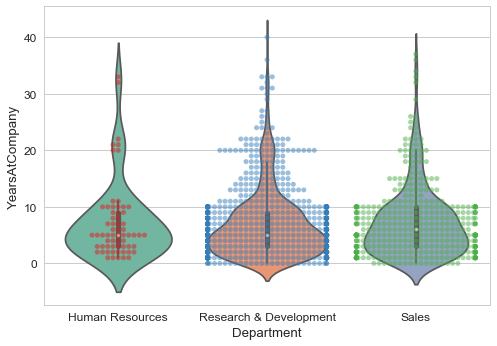

In [49]:
# It can also be useful to combine swarmplot() or swarmplot() with violinplot() or boxplot() to show each observation along with a summary of the distribution

sns.violinplot(x='Department', y='YearsAtCompany', 
              data=df,
              palette="Set2");
sns.swarmplot(x='Department', y='YearsAtCompany', 
              data=df,
              palette="Set1", alpha=.5);

# Statistical estimation within categories

### Bar plots

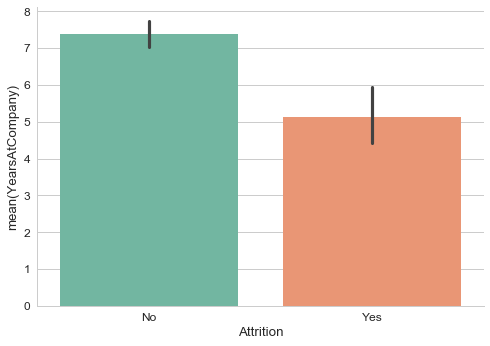

In [63]:
# operates on a full dataset and shows an arbitrary estimate, using the mean by default
# it also uses bootstrapping to compute a confidence interval around the estimate and plots that using error bars

sns.barplot(x='Attrition', y='YearsAtCompany', 
            data=df, 
            palette="Set2")
sns.despine()

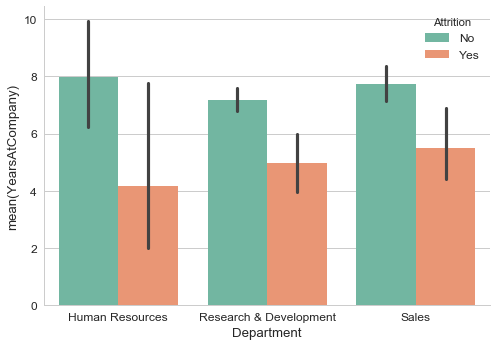

In [64]:
sns.barplot(x='Department', y='YearsAtCompany', hue='Attrition', 
            data=df,
            palette="Set2")
sns.despine()

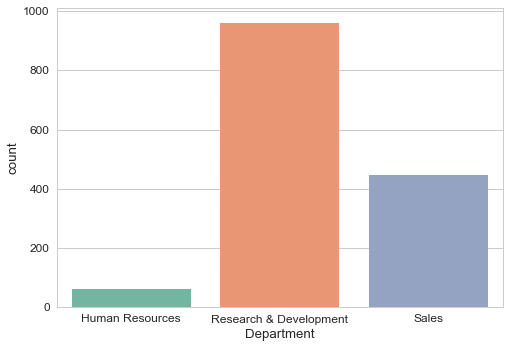

In [70]:
# to plot distribution of categorical variable 

sns.countplot(x='Department', 
            data=df,
            palette="Set2")

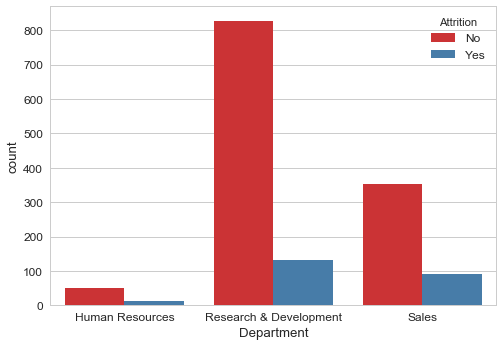

In [71]:

sns.countplot(x='Department', hue='Attrition',
            data=df,
            palette="Set1")

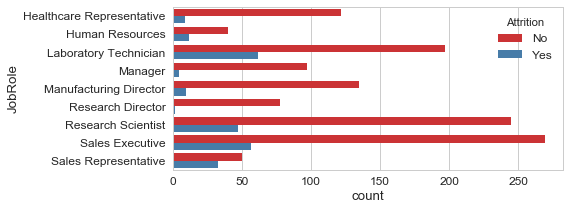

In [74]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y='JobRole', hue='Attrition',
            data=df,
            palette="Set1")

# Drawing multi-panel categorical plots

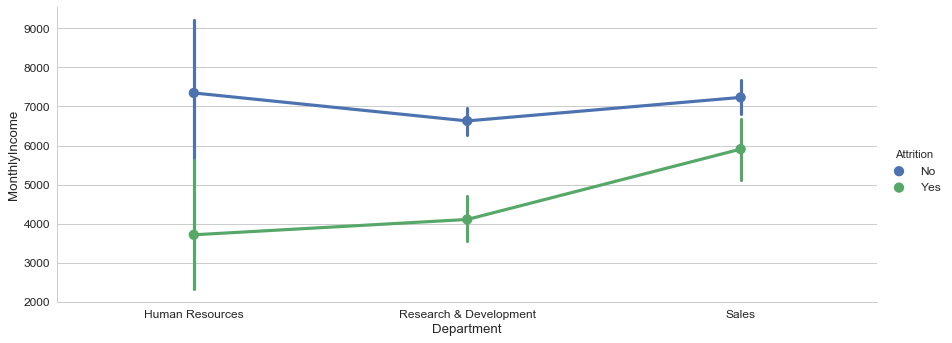

In [87]:
sns.factorplot(x='Department', y='MonthlyIncome', hue='Attrition',
               data=df,
               size=5, aspect=2.5)

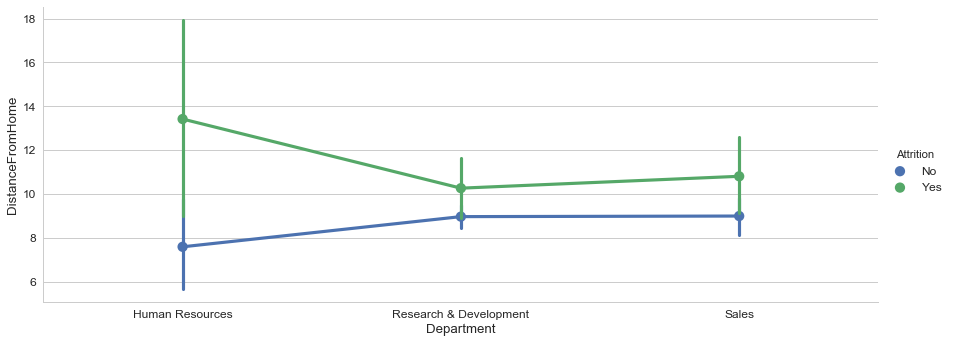

In [90]:
sns.factorplot(x='Department', y='DistanceFromHome', hue='Attrition',
               data=df,
               size=5, aspect=2.5)

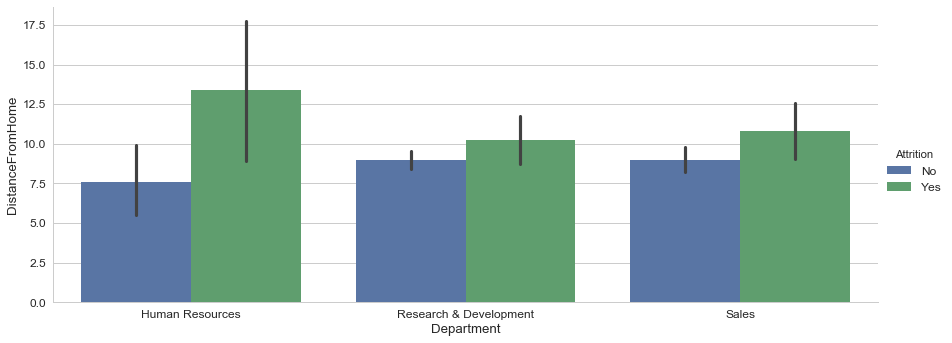

In [92]:
# he kind parameter lets you chose any of the kinds of plots discussed above
sns.factorplot(x='Department', y='DistanceFromHome', hue='Attrition',
               data=df,
               size=5, aspect=2.5,
               kind="bar")

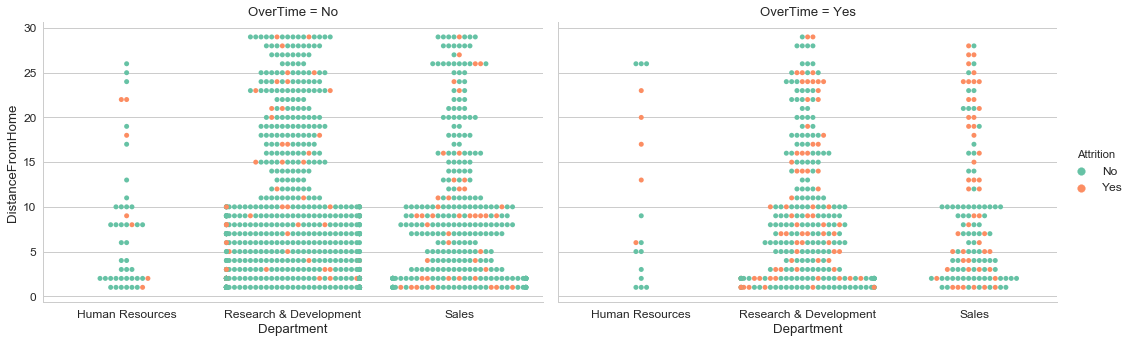

In [101]:
# it is very easy to “facet” the plot and investigate the role of other categorical variables

sns.factorplot(x='Department', y='DistanceFromHome', hue='Attrition',
               col="OverTime", 
               data=df, 
               kind="swarm",
               palette="Set2", size=5, aspect=1.5);

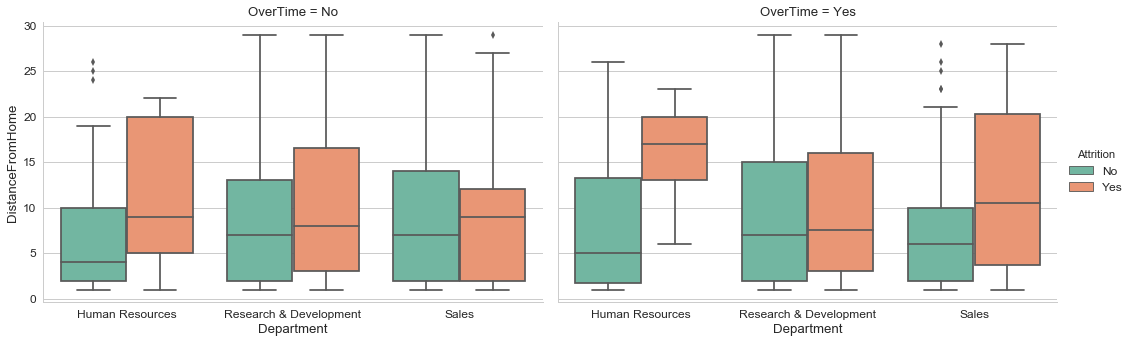

In [108]:
# change 'kind' to 'box' to change way to visualize 

sns.factorplot(x='Department', y='DistanceFromHome', hue='Attrition',
               col="OverTime", 
               data=df, 
               kind="box",
               palette="Set2", size=5, aspect=1.5);